### Сделаем проверку одного максимального сиквенса на распределение ГЦ внутри него. Только одного, потому что сиквенсы сильно совпадают и не нужно нам лишних вычислений

In [23]:
import sys
import glob
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter('ignore')
sns.set(color_codes=True)
plt.xkcd()  # Make sketchs, not smooth plots

In [54]:
def convert_qual(line):  # converts quatity words to quality nums
    mod_line = [ord(w) - 32 for w in list(line)]
    return mod_line


def read_file(file):  # reads file and writes it into list with describing each seq dicts
    fastq = []
    with gzip.open(file, 'rt') as fastq_file:
        counter = 0
        for line in fastq_file:
            if line.startswith('@'):
                loc_dic = {}
                loc_dic['name'] = line.strip()[1:]
                counter = 1
                continue
            if counter == 1:
                loc_dic['seq'] = line.strip()
                counter = 0
                fastq.append(loc_dic)
    return fastq


def GC_counter(seq):  # returns %GC of one seq
    return (seq.count('C') + seq.count('G')) / len(seq)

def gc_window_counter(seq, window=20, shift=10):
    # return GC per windows in seq
    gc_list = []
    for i in range(0, len(seq), shift):
        ls = seq[i:i+window]
        gc = GC_counter(ls)
        gc_list.append(gc)
        
    return np.arange(0,len(seq), shift),gc_list

In [28]:
def max_str(fn):
    # get one seq from fastq with max len
    fastq = read_file(fn)
    seqs = [(f['seq'],len(f['seq'])) for f in fastq]
    s = sorted(seqs, key=lambda x:x[-1], reverse=True)[0][0]
    return s

In [38]:
file_names = glob.glob('../data/interim/*.gz')
file_names

['../data/interim/SRR6994628_1U.fastq.gz',
 '../data/interim/SRR6994628_1P.fastq.gz',
 '../data/interim/SRR6994628_2P.fastq.gz',
 '../data/interim/SRR6994628_2U.fastq.gz']

In [39]:
strs = [max_str(file_names[n]) for n in range(4)]

In [41]:
set(strs) # all 4 seqs are equal

{'GTAAAGCGAATGATTAGAGGTCTTGGGGCCGAAACGATCTCAACCTATTCTCAAACTTTAAATGGGTAAGAAGCCCGGCTCGCTGGCGTGGAGCCGGGCGTGGAATGCGAGTGCCTAGTGGGCCACTTTTGGTAAGCAGAACTGGCGCTGCGGGATGAACCGAACGCCGGGTTAAGGCGCCCGATGCCGACGCTCATCAGACCCCAGAAAAGGTGTTGGTTGATATAGACAGCAGGACGGTGGCCATGGAA'}

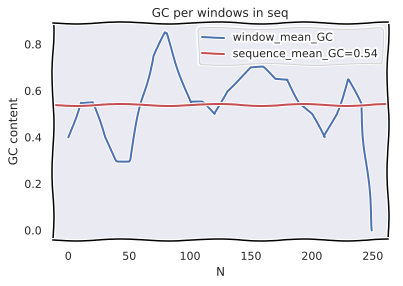

In [69]:
X,Y = gc_window_counter(strs[0])

plt.plot(X,Y, label='window_mean_GC')
plt.axhline(np.mean(Y), color='r',label='sequence_mean_GC={}'.format(round(np.mean(Y),2)))
plt.ylabel('GC content')
plt.xlabel('N')
plt.title('GC per windows in seq')

plt.legend()

### ГЦ скачет как и полагается. Это дает повод не заморачиваться на отсев контаминации, ее сильно мало